In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df = df._get_numeric_data()
df.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244


In [4]:
mask = np.random.rand(len(df)) < 0.8
train = df[mask]
test = df[~mask]

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
regr = LinearRegression()

train_X_transform = poly.fit_transform(train[['ENGINESIZE']])
regr.fit(train_X_transform, train[['CO2EMISSIONS']])
print("linear regression coefficients:", regr.coef_)
print("linear regression intercept:", regr.intercept_)

linear regression coefficients: [[ 0.         50.52121551 -1.55365297]]
linear regression intercept: [107.80808027]


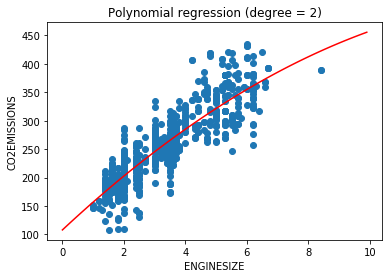

In [6]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)

xx = np.arange(0, 10, 0.1)
plt.plot(xx, regr.intercept_ + regr.coef_[0][1] * xx + regr.coef_[0][2] * np.power(xx, 2), color='r')
plt.title('Polynomial regression (degree = 2)')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [7]:
test_X_transform = poly.fit_transform(test[['ENGINESIZE']])

Y = test[['CO2EMISSIONS']]
Yhat = regr.predict(test_X_transform)

print("Mean Absolute Error:%.2f" % np.mean(np.absolute(Yhat - Y)))
print("Mean Square Error:%.2f" % np.mean((Yhat - Y)**2))
print("R2:%.2f" % regr.score(test_X_transform, Y))

Mean Absolute Error:23.18
Mean Square Error:879.28
R2:0.78


Mean Absolute Error:23.30
Mean Square Error:944.42
R2:0.76


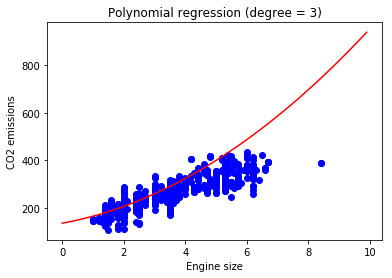

In [15]:
poly2 = PolynomialFeatures(degree=3)
regr2 = LinearRegression()

Xtrain = train[['ENGINESIZE']]
Ytrain = train[['CO2EMISSIONS']]

Xtest = train[['ENGINESIZE']]
Ytest = train[['CO2EMISSIONS']]

Xtrain_poly = poly2.fit_transform(Xtrain)

regr2.fit(Xtrain_poly, Ytrain)

Xtest_poly = poly2.fit_transform(Xtest)
Yhat = regr2.predict(Xtest_poly)
print("Mean Absolute Error:%.2f" % np.mean(np.absolute(Yhat - Ytest)))
print("Mean Square Error:%.2f" % np.mean((Yhat - Ytest)**2))
print("R2:%.2f" % regr2.score(Xtest_poly, Ytest))

XX = np.arange(0,10, 0.1)
plt.scatter(Xtrain, Ytrain, color='b')
plt.plot(XX, regr2.intercept_ + regr2.coef_[0][1]*XX + regr2.coef_[0][2]*np.power(XX,2), color='r')
plt.title('Polynomial regression (degree = 3)')
plt.xlabel('Engine size')
plt.ylabel('CO2 emissions')
plt.show()



In [13]:
regr2.coef_

array([[ 0.        , 23.82315017,  5.77344067, -0.60502344]])

In [16]:
Xtrain_poly

array([[ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       ...,
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [17]:
Xtrain

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5
5,3.5
6,3.5
7,3.7
8,3.7
9,2.4
